In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel("Weddings.xlsx")
dataset.head(26)

C:\Users\SANI\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,CoupleIncome,BrideAge,Payor,WeddingCost,Attendance
0,130000,22,0,60700,300
1,157000,23,0,52000,350
2,98000,27,1,47000,150
3,72000,29,0,42000,200
4,86000,25,0,34000,250
5,90000,28,0,30500,150
6,43000,19,1,30000,250
7,100000,30,0,30000,300
8,65000,24,0,28000,250
9,78000,35,0,26000,200


In [3]:
dataset.shape

(25, 5)

In [4]:
#checking for missing values
dataset.isnull().sum()

CoupleIncome    0
BrideAge        0
Payor           0
WeddingCost     0
Attendance      0
dtype: int64

In [5]:
#checking for duplicate rows
dataset.duplicated().any()

False

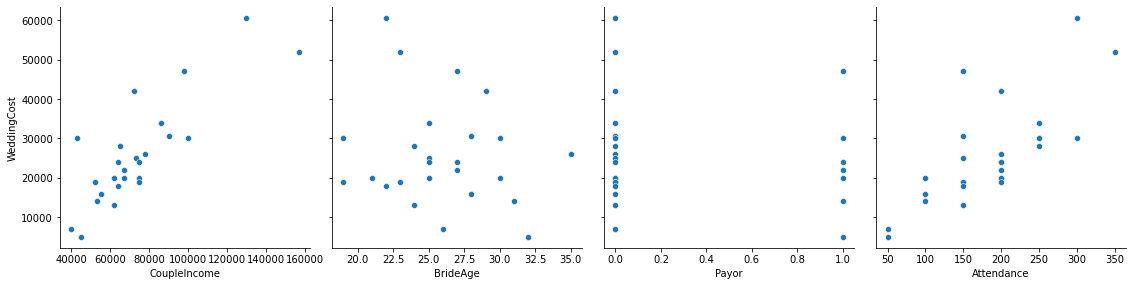

In [6]:
# visual representation of how independent variables are correlated to the dependent variable 
sns.pairplot(dataset, x_vars=['CoupleIncome', 'BrideAge', 'Payor','Attendance'], y_vars='WeddingCost', height=4, aspect=1, kind='scatter')
plt.show()

CoupleIncome is strongly, positively and linearly correlated to the target variable whiles the Payor and the BrideAge 
seems to be uncorrelated to the target value

In [7]:
#setting the value for x and y
x = dataset[['CoupleIncome', 'BrideAge', 'Payor','Attendance']]
y = dataset['WeddingCost']


In [8]:
#splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.33, random_state=100) 


In [9]:
#implementing the model
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()  
mlr.fit(x_train, y_train) 


LinearRegression()

In [10]:
#model equation
print('intercept: ',mlr.intercept_)
print("coefficients; ") 
list(zip(x,mlr.coef_))


intercept:  -5851.116182584919
coefficients; 


[('CoupleIncome', 0.3504026983713417),
 ('BrideAge', -83.04290196759429),
 ('Payor', 3990.8375213188087),
 ('Attendance', 41.305716583602766)]

In [11]:
#Actual value and the predicted value
y_pred=mlr.predict(x_test)
mlr_diff = pd.DataFrame({'Actual WeddingCost': y_test, 'Predicted WeddingCost': y_pred, 'Residual':y_pred-y_test})
mlr_diff

,Actual WeddingCost,Predicted WeddingCost,Residual
9,26000,26834.936038,834.936038
22,13000,20076.678957,7076.678957
13,22000,27635.687093,5635.687093
11,24000,30438.908680,6438.908680
5,30500,29555.782903,-944.217097
19,18000,20943.570157,2943.570157
23,7000,8071.162130,1071.162130
21,14000,18267.306050,4267.306050
6,30000,21955.651377,-8044.348623


In [12]:
from sklearn import metrics

print("R squared value for the model: ",mlr.score(x,y)*100)

R squared value for the model:  74.4335024530915


The model is good enough for predicting the wedding cost because 74.43% of the data fits the model

In [13]:
#Prediction for (coupleIncome:$10000, guests:175 ,bride's age 33 and payor:Bride's Family(0)
mlr.predict([[100000, 33, 0, 175]])

array([33677.23829175])

The model predicted the wedding cost of $33677.24 for the given set of data